In [1]:
from __future__ import print_function

from collections import OrderedDict

import os
import sys
import glob
from itertools import cycle

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

from os.path import join

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import seaborn as sns
sns.set()

from os.path import join

print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
2.7.14 | packaged by conda-forge | (default, Dec  9 2017, 16:18:43) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]

matplotlib version: 2.1.1
pandas version: 0.22.0
numpy version: 1.12.1
seaborn version: 0.8.1


In [2]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("deep"), font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

In [3]:
df1 = pd.read_csv("closed_rmsd_to_closed.dat", sep=r'\s+', skiprows=1, names=['time (ns)', 'RMSD1'])
df2 = pd.read_csv("closed_rmsd_to_open.dat", sep=r'\s+', skiprows=1, names=['time (ns)', 'RMSD2'])
df3 = pd.read_csv("open_rmsd_to_closed.dat", sep=r'\s+', skiprows=1, names=['time (ns)', 'RMSD1'])
df4 = pd.read_csv("open_rmsd_to_open.dat", sep=r'\s+', skiprows=1, names=['time (ns)', 'RMSD2'])

In [4]:
df1['RMSD2']=df2['RMSD2']
df1['State']="Closed"
df3['RMSD2']=df4['RMSD2']
df3['State']="Open"

In [5]:
df_all=pd.concat([df1,df3])
df_all= df_all.drop(['time (ns)'], axis=1)
df_all

,RMSD1,RMSD2,State
0,1.1135,3.0703,Closed
1,1.0591,3.0482,Closed
2,1.0825,3.1266,Closed
3,1.0713,2.9878,Closed
4,1.0782,2.9886,Closed
5,1.1921,2.9779,Closed
6,1.1777,2.9638,Closed
7,1.4447,2.7404,Closed
8,1.2687,2.9794,Closed
9,1.1978,3.1453,Closed


In [1]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("deep"), font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(1)

df_all.groupby("State").plot(x="RMSD1", y='RMSD2', ax=axes, marker="o", ms=10, ls='None')
start, stop = axes.get_xlim()
loc = plticker.MultipleLocator(base=0.5)
axes.xaxis.set_major_locator(loc)
#axes.set_aspect('equal')
axes.set_xlabel(r'RMSD to closed ($\AA$)')
axes.set_ylabel(r'RMSD to open ($\AA$)')
axes.set(xlim=(0,6) , ylim=(0, 4))
axes.legend_.remove()
plt.savefig('./RMSD.pdf')
plt.savefig('./RMSD.png')
plt.show()

NameError: name 'sns' is not defined

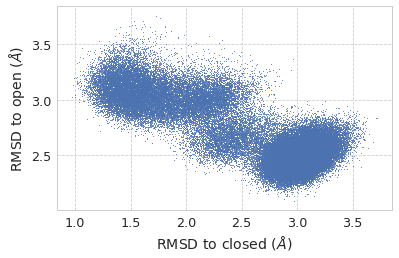

In [14]:
fig, axes = plt.subplots(1)

df1.plot(x="RMSD1", y='RMSD2', ax=axes, marker=".", ms=2, ls='None')
#grid.add_legend();
start, stop = axes.get_xlim()
loc = plticker.MultipleLocator(base=0.5)
axes.xaxis.set_major_locator(loc)
axes.set_aspect('equal')
axes.set_xlabel(r'RMSD to closed ($\AA$)')
axes.set_ylabel(r'RMSD to open ($\AA$)')
#axes.set(xlim=(10,14) , ylim=(0, 4))
axes.legend_.remove()
plt.savefig('./RMSD1.pdf')
#plt.savefig('./twist7.png')
plt.show()

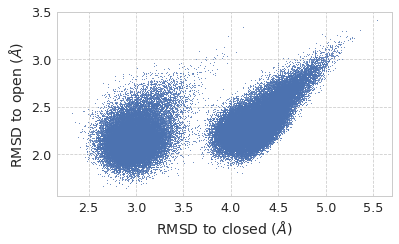

In [17]:
fig, axes = plt.subplots(1)

df3.plot(x="RMSD1", y='RMSD2', ax=axes, marker=".", ms=2, ls='None')
#grid.add_legend();
start, stop = axes.get_xlim()
loc = plticker.MultipleLocator(base=0.5)
axes.xaxis.set_major_locator(loc)
axes.set_aspect('equal')
axes.set_xlabel(r'RMSD to closed ($\AA$)')
axes.set_ylabel(r'RMSD to open ($\AA$)')
#axes.set(xlim=(0,4) , ylim=(10, 14))
axes.legend_.remove()
plt.savefig('./RMSD2.pdf')
#plt.savefig('./twist7.png')
plt.show()